In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from scipy import interp
import warnings
from sklearn.preprocessing import StandardScaler

 
warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
df = pd.read_excel("kor_etf_data_final.xlsx")
r_df = pd.read_excel("kor_random_data_final.xlsx")

In [3]:
df.head()

,Unnamed: 0,index,date,KOD_p,KBS_p,TIG_p,KOD_v,KBS_v,TIG_v,month,...,month_8,month_9,month_10,month_11,month_12,MON,TUE,WED,THU,FRI
0,0,263,2012-01-25,16513.015625,93433.015625,10870,2836393,2014,21902,1,...,0,0,0,0,0,0,0,1,0,0
1,1,268,2012-02-01,1263.925903,93600.031250,10835,890,2013,6415,2,...,0,0,0,0,0,0,0,1,0,0
2,2,269,2012-02-02,1252.214722,93591.156250,10665,1630,3019,22187,2,...,0,0,0,0,0,0,0,0,1,0
3,3,270,2012-02-03,1198.162109,93617.820313,10570,1960,2263,13551,2,...,0,0,0,0,0,0,0,0,0,1
4,4,272,2012-02-07,16175.183594,93538.734375,10615,1842404,2012,10603,2,...,0,0,0,0,0,0,1,0,0,0


In [4]:
r_df.head()

,Unnamed: 0,index,date,KOD_p,KBS_p,TIG_p,KOD_v,KBS_v,TIG_v,month,...,month_8,month_9,month_10,month_11,month_12,MON,TUE,WED,THU,FRI
0,0,263,2012-01-25,16513.015625,93433.015625,10870,2836393,2014,21902,1,...,0,0,0,0,0,0,0,1,0,0
1,1,268,2012-02-01,1263.925903,93600.031250,10835,890,2013,6415,2,...,0,0,0,0,0,0,0,1,0,0
2,2,269,2012-02-02,1252.214722,93591.156250,10665,1630,3019,22187,2,...,0,0,0,0,0,0,0,0,1,0
3,3,270,2012-02-03,1198.162109,93617.820313,10570,1960,2263,13551,2,...,0,0,0,0,0,0,0,0,0,1
4,4,272,2012-02-07,16175.183594,93538.734375,10615,1842404,2012,10603,2,...,0,0,0,0,0,0,1,0,0,0


In [5]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True)
r_df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [6]:
print(df.columns)
print(r_df.columns)

Index(['index', 'date', 'KOD_p', 'KBS_p', 'TIG_p', 'KOD_v', 'KBS_v', 'TIG_v',
       'month', 'week',
       ...
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'MON', 'TUE',
       'WED', 'THU', 'FRI'],
      dtype='object', length=108)
Index(['index', 'date', 'KOD_p', 'KBS_p', 'TIG_p', 'KOD_v', 'KBS_v', 'TIG_v',
       'month', 'week',
       ...
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'MON', 'TUE',
       'WED', 'THU', 'FRI'],
      dtype='object', length=108)


In [7]:
df_col = ['KOD', 'KBS', 'TIG']

dummy = ['month_1', 
         'month_2', 
         'month_3', 
         'month_4', 
         'month_5', 
         'month_6', 
         'month_7', 
         'month_8', 
         'month_9',
         'month_10',
         'month_11',
         'month_12',
         'MON', 'TUE','WED', 'THU', 'FRI']

td = [1, 3, 5, 10, 20, 40, 60, 120, 250]

In [8]:
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
lw=2

KOD
Real Data Processing for horizon =  1
AUC good =  0.6807336182336181


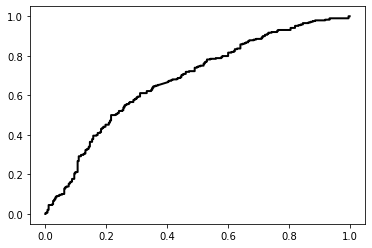

Random Data Processing for horizon =  1
Random data AUC =  0.6929563492063492


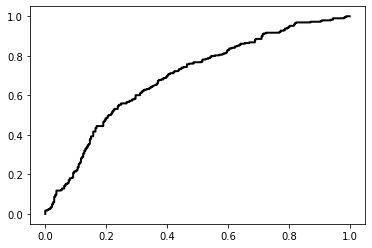

C =  0.1
Real_data_accuracy   :  0.5704
Random data_accuracy :  0.6328
Gain =  -0.0624
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.8221101174552218


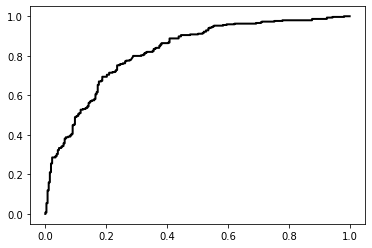

Random Data Processing for horizon =  3
Random data AUC =  0.8422762363372316


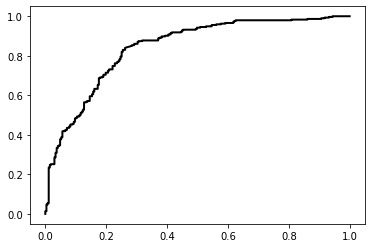

C =  0.1
Real_data_accuracy   :  0.7077
Random data_accuracy :  0.7861
Gain =  -0.0784
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.8268922758977009


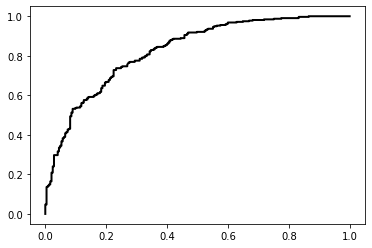

Random Data Processing for horizon =  5
Random data AUC =  0.8552570395246706


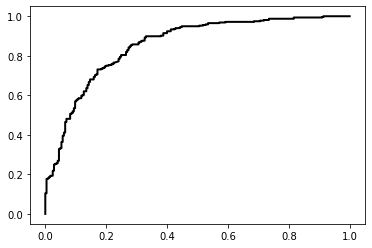

C =  0.1
Real_data_accuracy   :  0.7433
Random data_accuracy :  0.7932
Gain =  -0.0499
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.8196890124600968


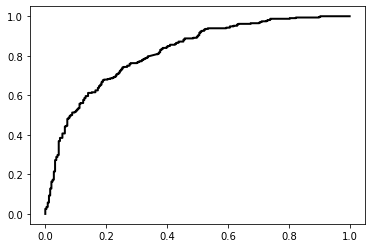

Random Data Processing for horizon =  10
Random data AUC =  0.8380702296364948


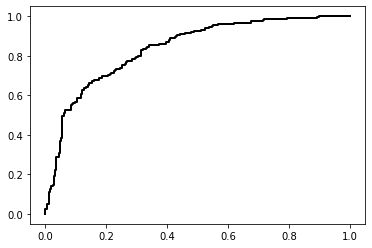

C =  0.1
Real_data_accuracy   :  0.7308
Random data_accuracy :  0.754
Gain =  -0.0232
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.8717535853976532


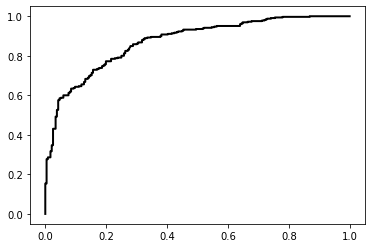

Random Data Processing for horizon =  20
Random data AUC =  0.8873402868318123


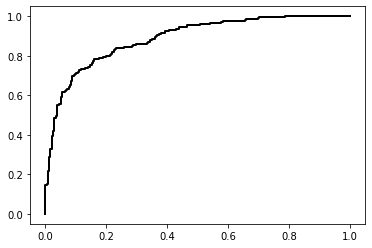

C =  0.1
Real_data_accuracy   :  0.7701
Random data_accuracy :  0.7843
Gain =  -0.0142
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.8894923258559623


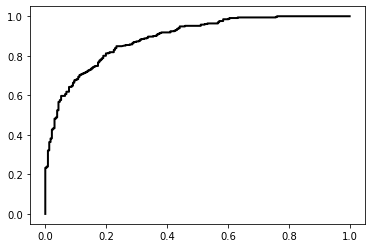

Random Data Processing for horizon =  40
Random data AUC =  0.9103174603174602


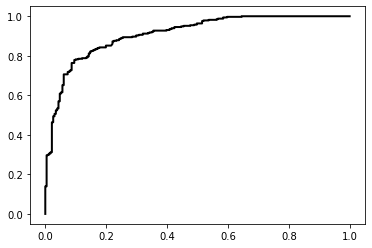

C =  0.1
Real_data_accuracy   :  0.7807
Random data_accuracy :  0.8164
Gain =  -0.0357
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9079894080830235


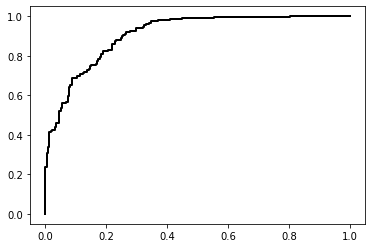

Random Data Processing for horizon =  60
Random data AUC =  0.9200791719046727


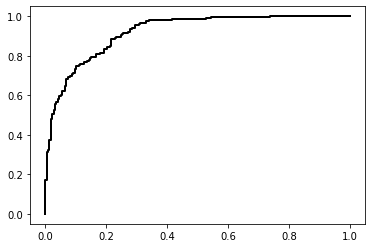

C =  0.1
Real_data_accuracy   :  0.8324
Random data_accuracy :  0.8414
Gain =  -0.009
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.8926026149394491


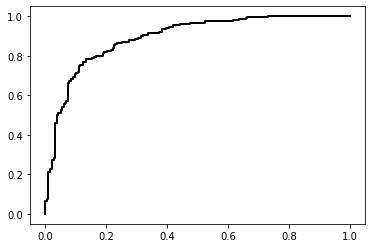

Random Data Processing for horizon =  120
Random data AUC =  0.8920667666916728


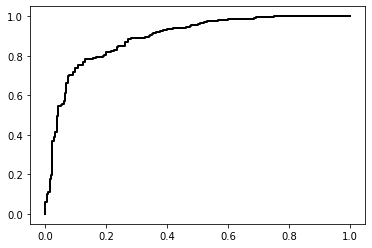

C =  0.1
Real_data_accuracy   :  0.8075
Random data_accuracy :  0.8093
Gain =  -0.0018
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.8740464039564372


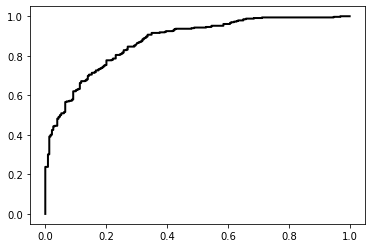

Random Data Processing for horizon =  250
Random data AUC =  0.8812805808386385


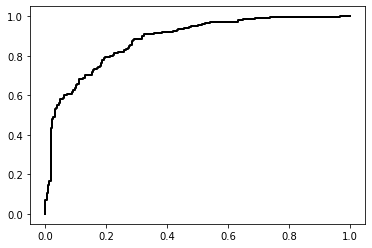

C =  0.1
Real_data_accuracy   :  0.7861
Random data_accuracy :  0.7897
Gain =  -0.0036
---------------------------------------------

KBS
Real Data Processing for horizon =  1
AUC good =  0.7148939444458694


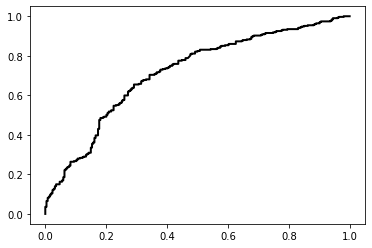

Random Data Processing for horizon =  1
Random data AUC =  0.7135730590679422


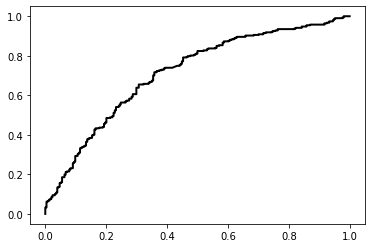

C =  0.1
Real_data_accuracy   :  0.5651
Random data_accuracy :  0.6007
Gain =  -0.0356
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.8098891966759003


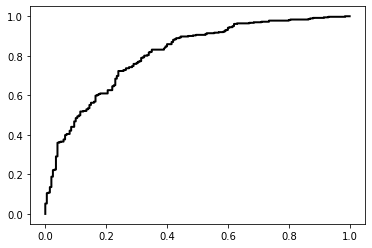

Random Data Processing for horizon =  3
Random data AUC =  0.8076869806094182


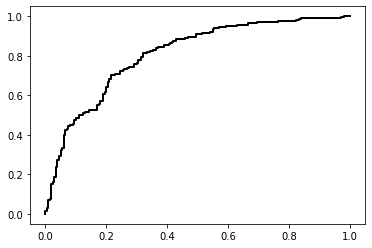

C =  0.1
Real_data_accuracy   :  0.6809
Random data_accuracy :  0.7273
Gain =  -0.0464
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.879002624671916


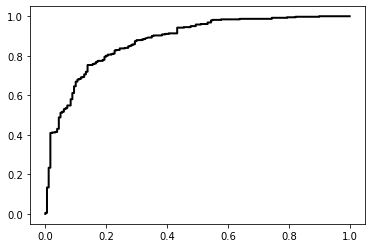

Random Data Processing for horizon =  5
Random data AUC =  0.852989209682123


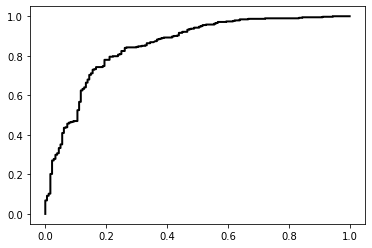

C =  0.1
Real_data_accuracy   :  0.7237
Random data_accuracy :  0.7308
Gain =  -0.0071
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.8881450278321047


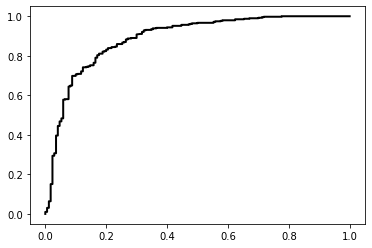

Random Data Processing for horizon =  10
Random data AUC =  0.8733413570031594


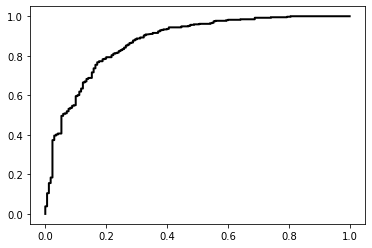

C =  0.1
Real_data_accuracy   :  0.779
Random data_accuracy :  0.7825
Gain =  -0.0035
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9543937511095331


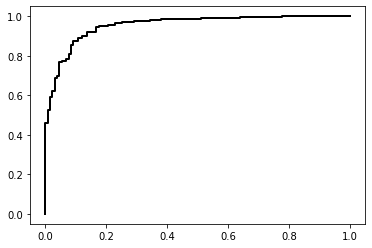

Random Data Processing for horizon =  20
Random data AUC =  0.9351322563465293


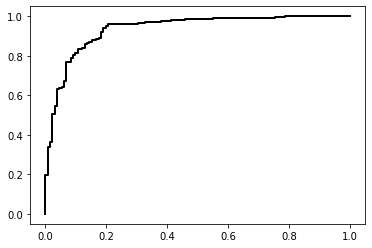

C =  0.1
Real_data_accuracy   :  0.8164
Random data_accuracy :  0.8039
Gain =  0.0125
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9654572940287226


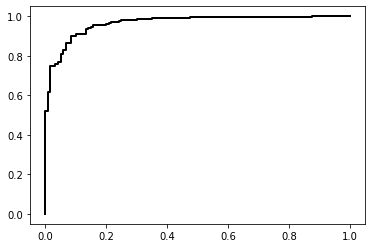

Random Data Processing for horizon =  40
Random data AUC =  0.9539304610733182


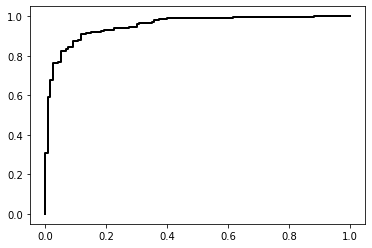

C =  0.1
Real_data_accuracy   :  0.8217
Random data_accuracy :  0.8556
Gain =  -0.0339
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9645292522278187


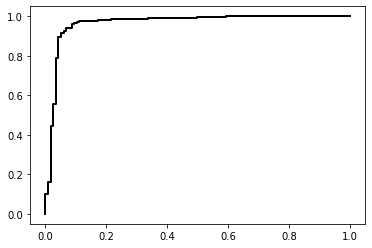

Random Data Processing for horizon =  60
Random data AUC =  0.965865943432778


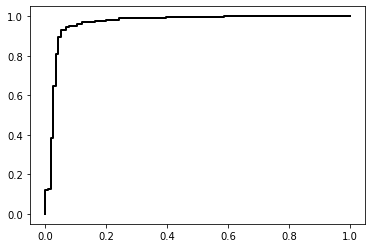

C =  0.1
Real_data_accuracy   :  0.8093
Random data_accuracy :  0.8324
Gain =  -0.0231
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.986379037723063


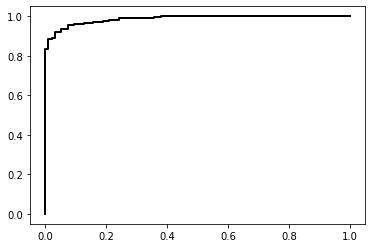

Random Data Processing for horizon =  120
Random data AUC =  0.9839168737293879


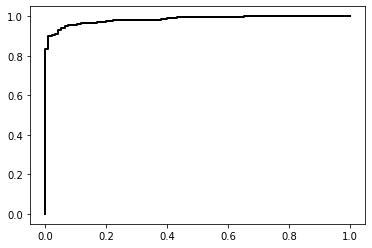

C =  0.1
Real_data_accuracy   :  0.836
Random data_accuracy :  0.861
Gain =  -0.025
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9878552971576227


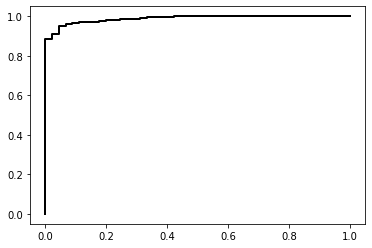

Random Data Processing for horizon =  250
Random data AUC =  0.9877691645133505


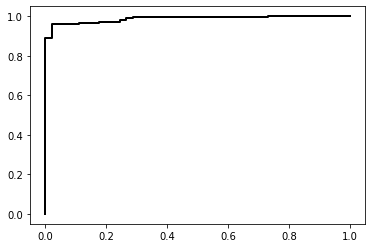

C =  0.1
Real_data_accuracy   :  0.9198
Random data_accuracy :  0.9198
Gain =  0.0
---------------------------------------------

TIG
Real Data Processing for horizon =  1
AUC good =  0.6786586606961125


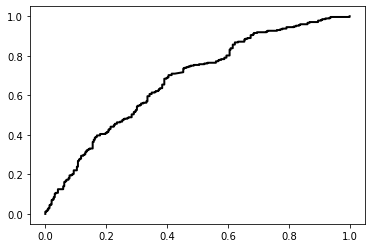

Random Data Processing for horizon =  1
Random data AUC =  0.6830030022389579


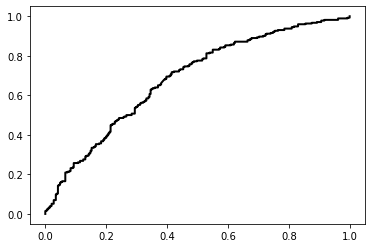

C =  0.1
Real_data_accuracy   :  0.615
Random data_accuracy :  0.6381
Gain =  -0.0231
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.8473597149764602


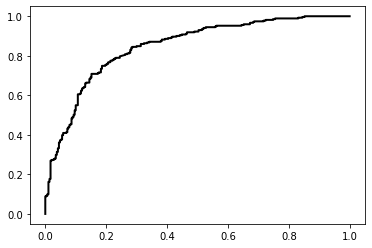

Random Data Processing for horizon =  3
Random data AUC =  0.8364168469270901


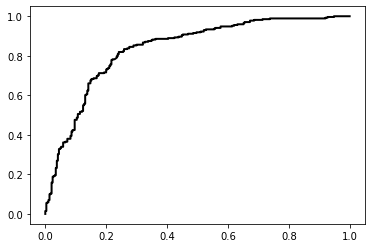

C =  0.1
Real_data_accuracy   :  0.7772
Random data_accuracy :  0.7843
Gain =  -0.0071
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.8893589906970817


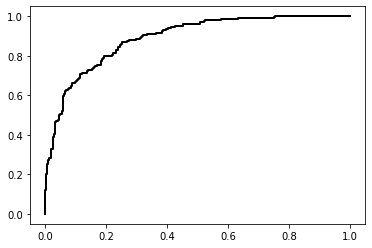

Random Data Processing for horizon =  5
Random data AUC =  0.8785650567095704


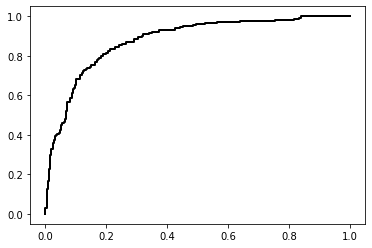

C =  0.1
Real_data_accuracy   :  0.8039
Random data_accuracy :  0.8075
Gain =  -0.0036
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.9135805613570374


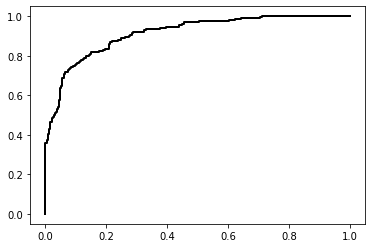

Random Data Processing for horizon =  10
Random data AUC =  0.8920457439763639


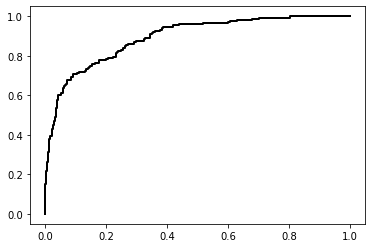

C =  0.1
Real_data_accuracy   :  0.8146
Random data_accuracy :  0.7897
Gain =  0.0249
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9236157014287893


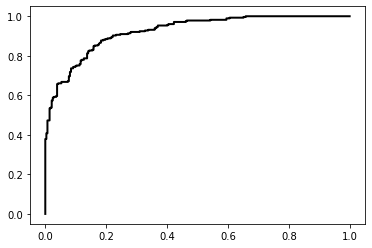

Random Data Processing for horizon =  20
Random data AUC =  0.9005949051710989


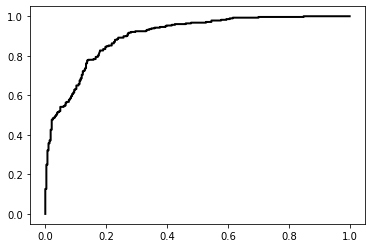

C =  0.1
Real_data_accuracy   :  0.82
Random data_accuracy :  0.8217
Gain =  -0.0017
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9300986423958917


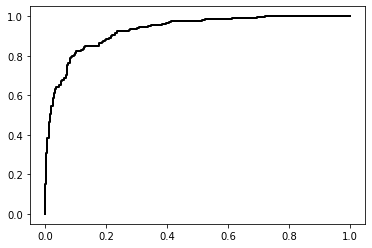

Random Data Processing for horizon =  40
Random data AUC =  0.9226369044592465


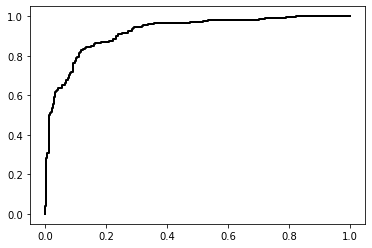

C =  0.1
Real_data_accuracy   :  0.8396
Random data_accuracy :  0.8431
Gain =  -0.0035
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9736270022883295


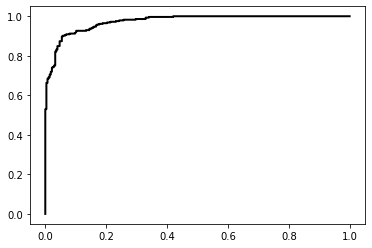

Random Data Processing for horizon =  60
Random data AUC =  0.9633358759216883


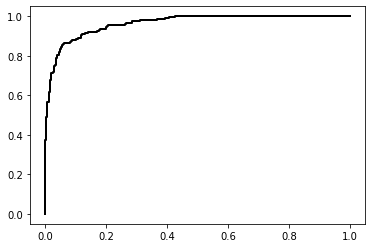

C =  0.1
Real_data_accuracy   :  0.8948
Random data_accuracy :  0.8877
Gain =  0.0071
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9464911607439814


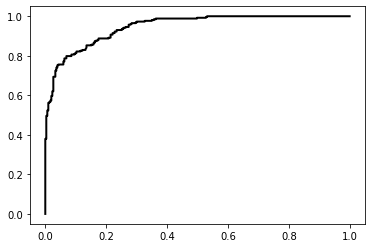

Random Data Processing for horizon =  120
Random data AUC =  0.9322281065315834


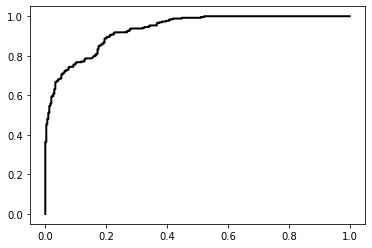

C =  0.1
Real_data_accuracy   :  0.8538
Random data_accuracy :  0.82
Gain =  0.0338
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9615384615384616


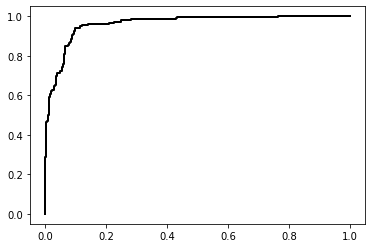

Random Data Processing for horizon =  250
Random data AUC =  0.9584425726557706


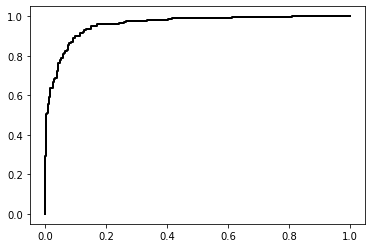

C =  0.1
Real_data_accuracy   :  0.8556
Random data_accuracy :  0.893
Gain =  -0.0374
---------------------------------------------

Wall time: 10min 18s


In [9]:
%%time
#df_data = pd.aDataFrame
#df_data = df[dummy]

all_result = {}

for i in df_col:
    
    print(i)
    
    sub_result = {}
    
    for j in td:
                
        y_col = str(i)+"_"+str(j)+"_y"
        p_col = str(i)+"_p"
        v_col = str(i)+"_v"

        #df_data[[r_col, v_col, y_col]] = df[[r_col, v_col, y_col]]
        
        X = df.drop([y_col,p_col,v_col, "date","month","week"], axis = 1)
        y = df[y_col]
        
        r_X = r_df.drop([y_col,p_col,v_col,"date","month","week"], axis = 1)
        r_y = r_df[y_col]
                
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            test_size=0.3,
                                                            random_state=0)
        
        r_X_train, r_X_test, r_y_train, r_y_test = train_test_split(r_X, r_y, 
                                                            test_size=0.3,
                                                            random_state=0)
        
        sc = StandardScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)
        
        r_sc = StandardScaler()
        r_sc.fit(r_X_train)
        r_X_train_std = r_sc.transform(X_train)
        r_X_test_std = r_sc.transform(X_test)
        
        print("Real Data Processing for horizon = ",j)
        
        maxval = -10000.0
        c = 0.0
        sval = 0.0
        
        for cval in {0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0,}:
            
            #print("<  {}  >".format(cval))
         
            clf = svm.SVC(kernel='rbf', C=cval, probability=True)
                        
            scores = cross_val_score(clf, X_train_std, y_train, cv=3)
            ascores = scores.mean()
            
            r_scores = cross_val_score(clf, r_X_train_std, r_y_train, cv=3)
            r_ascores = scores.mean()
            
            
            #print(ascores)
            #print(r_ascores)
            
            real_random = ascores - r_ascores
            
            sval = sval + real_random
            
            if maxval < real_random:
                
                maxval = real_random
                c = cval
                
            #print(cval, (real_random))
            
        #print (c,maxval, (sval/10.0))
        clf = svm.SVC(kernel='rbf', C=c, probability=True)
        clf.fit(X_train_std,y_train)
        lw=2            
        
        predictions = clf.predict(X_test_std)
        probs = clf.predict_proba(X_test_std)        
        
        fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        print ("AUC good = ",roc_auc)        
        plt.plot(fpr, tpr, lw=lw, color='black')
        #plt.title("Horizon = "+str(filename))
        plt.show()
        
        print("Random Data Processing for horizon = ",j)
        
        clf.fit(r_X_train_std,r_y_train)
        r_predictions = clf.predict(r_X_test_std)
        r_probs = clf.predict_proba(r_X_test_std)
        
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(r_y_test, r_probs[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        print ("Random data AUC = ",roc_auc)
        plt.plot(fpr, tpr, lw=lw, color='black')
        plt.show()

        print ("C = ",c)
        real_accuracy = round(metrics.accuracy_score(y_test, predictions),4)
        random_accuracy = round(metrics.accuracy_score(r_y_test, r_predictions),4)
        
        print("Real_data_accuracy   : ", real_accuracy)
        print("Random data_accuracy : ", random_accuracy)
                
        gain = (real_accuracy - metrics.accuracy_score(r_y_test,r_predictions))
        
        print ("Gain = ",round(gain,4))
        print ("---------------------------------------------\n")
        
        v_real_accuracy = str(j) + "_real_accuracy"
        v_random_accuracy = str(j) + "_random_accuracy"
        v_gain = str(j) +"_gain"
        
        sub_result[v_real_accuracy] = real_accuracy 
        sub_result[v_random_accuracy] = random_accuracy
        sub_result[v_gain] = gain
        
    all_result[i] = sub_result
    
    #print(all_result)

In [10]:
final_results = pd.DataFrame(all_result)

In [11]:
final_results

,KOD,KBS,TIG
1_real_accuracy,0.570400,0.565100,0.615000
1_random_accuracy,0.632800,0.600700,0.638100
1_gain,-0.062399,-0.035613,-0.023146
3_real_accuracy,0.707700,0.680900,0.777200
3_random_accuracy,0.786100,0.727300,0.784300
3_gain,-0.078396,-0.046373,-0.007114
5_real_accuracy,0.743300,0.723700,0.803900
5_random_accuracy,0.793200,0.730800,0.807500
5_gain,-0.049926,-0.007138,-0.003587
10_real_accuracy,0.730800,0.779000,0.814600


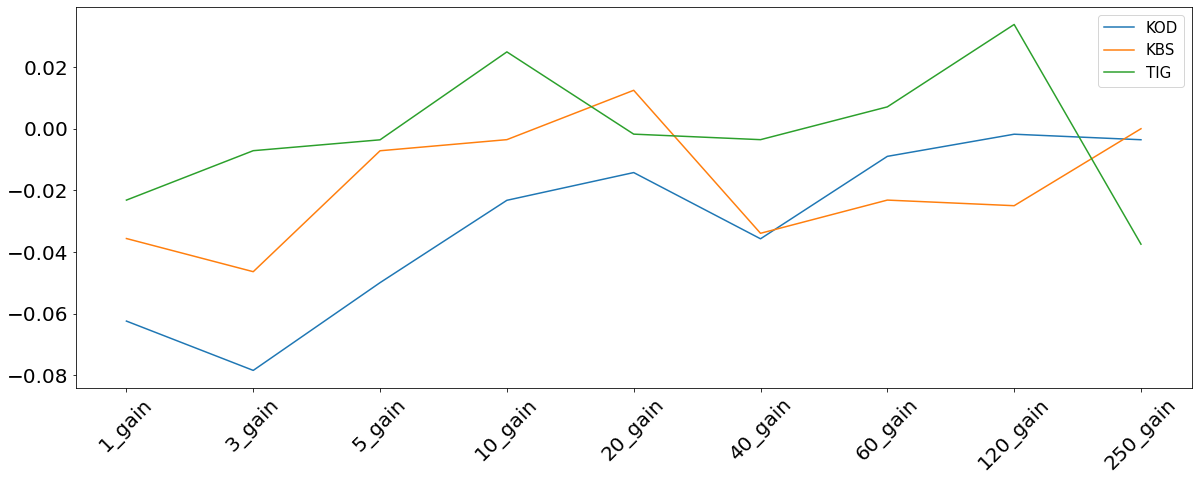

In [12]:
plt.figure(figsize = (20,7))
plt.plot(final_results[final_results.index.str.contains('gain')])
plt.xticks(rotation = 45, fontsize = 20)
plt.legend(final_results.columns, fontsize=15)
plt.yticks(fontsize = 20)
plt.show()

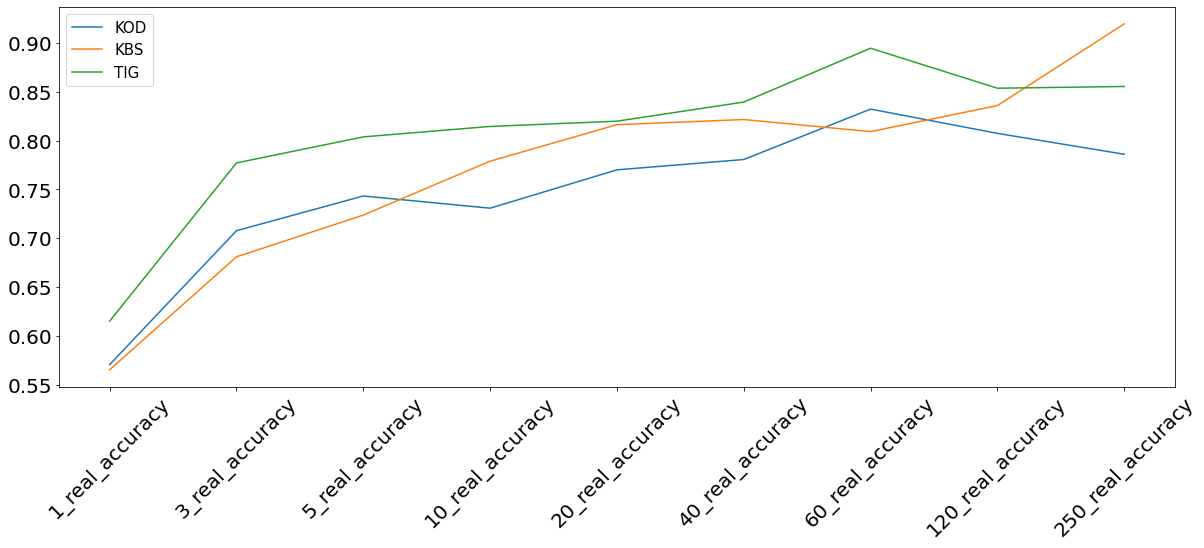

In [13]:
plt.figure(figsize = (20,7))
plt.plot(final_results[final_results.index.str.contains('real_accuracy')])
plt.xticks(rotation = 45, fontsize = 20)
plt.legend(final_results.columns, fontsize=15)
plt.yticks(fontsize = 20)
plt.show()